<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-18
# DS-Unit-1-Sprint-4-Linear-Algebra/
# module2-intermediate-linear-algebra

In [0]:
# numpy.dot() features

import numpy as np
A = np.array([[1,2,3],[4,5,6]]) # (2,3)
B = np.array([1, 1, 1]) # (3,) = (3,1) or (1,3)
C = np.array([[1], [1], [1]]) # (3,1)
D = np.array([1]) # (1,)
E = [1] * 3
np.dot(A, C)
print(np.matmul(A, C))
print(np.dot(A, B))
print(np.dot(B, E))

[[ 6]
 [15]]
[ 6 15]
3


In [0]:
np.dot(B, D)

ValueError: ignored

Lecture notebook  
https://colab.research.google.com/drive/15LurmlDpw7JO1ezJId4eWuGN6AY7xvm4  
Lecture video  
https://youtu.be/0jgtkB2fNv4  

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
def mean(v):
  return sum(v)/len(v)

def var(v, ddof=1):
  mu = mean(v)
  return sum([(x-mu)**2 for x in v])/(len(v)-ddof)

def std(v):
  return var(v)**.5

In [0]:
v1 = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

print("mean:", mean(v1), np.mean(v1))
print("variance:", var(v1), np.var(v1, ddof=1))
print("standard deviation:", std(v1), np.std(v1, ddof=1))

mean: 3052.714285714286 3052.714285714286
variance: 214387.90476190473 214387.90476190473
standard deviation: 463.0204150595357 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In probability theory and statistics, covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, the covariance is positive. Wikipedia

In [0]:
def covariance(v1, v2, dof=1):
  mu1 = mean(v1)
  mu2 = mean(v2)
  return sum([(x-mu1)*(y-mu2) for x,y in zip(v1,v2)])/(len(v1)-dof)

In [0]:
v2 = [127, 80, 105, 92, 120, 115, 93]
print("convariance of v1 and v2:", covariance(v1,v2))
np.cov(v1, v2)

convariance of v1 and v2: 7604.357142857142


array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.corrcoef.html#numpy.corrcoef  
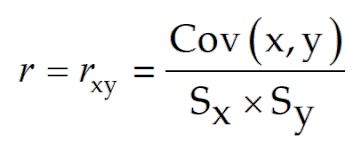

In [0]:
def corr_coef(v1, v2):
  return covariance(v1, v2)/(std(v1)*std(v2))

In [0]:
print("correlation coefficient of v1 and v2:", 
      corr_coef(v1, v2))
np.corrcoef(v1, v2)

correlation coefficient of v1 and v2: 0.9628339778148909


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html  

In [0]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv"
my_data = pd.read_csv(url)

In [0]:
print(my_data.shape)
my_data.head(2)

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
cols = my_data.select_dtypes(include=np.number).columns.tolist()
cols

['Unnamed: 0',
 'pclass',
 'survived',
 'age',
 'sibsp',
 'parch',
 'fare',
 'body',
 'has_cabin_number']

In [0]:
my_data[cols].isna().sum()

Unnamed: 0             0
pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
# "dot prodcut is zero"

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
va = [-5, 3, 7]
vb = [6, -8, 2]
print(np.dot(va, vb))
print(np.matmul(va, vb))

-40
-40


In [0]:
va1 = [[-5,3,7]]
vb1 = [[6,-8,2]]
print(np.dot(va1, vb1))

ValueError: ignored

In [0]:
va2 = [[-5],[3],[7]]
vb2 = [[6],[-8],[2]]
print(np.dot(va2, vb2))

ValueError: ignored

In [0]:
print(np.dot(va1, vb2))
print(np.matmul(va1, vb2))

[[-40]]
[[-40]]


In [0]:
print(np.dot(va2, vb1))
print(np.matmul(va2, vb1))

[[-30  40 -10]
 [ 18 -24   6]
 [ 42 -56  14]]
[[-30  40 -10]
 [ 18 -24   6]
 [ 42 -56  14]]


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
vc = np.array([2, -15, 6, 20])
norm_square = np.linalg.norm(vc) ** 2
print(norm_square)

665.0


In [0]:
np.dot(vc, vc)

665

In [0]:
vc = np.array([2, -15, 6, 20])
print(vc.T)
print(np.matmul(vc.T, vc))
print(np.dot(vc.T, vc))
print(np.matmul(vc, vc.T))
print(np.dot(vc, vc.T))

[  2 -15   6  20]
665
665
665
665


In [0]:
vc1 = np.array([[2, -15, 6, 20]])
print(vc1.T)
print(np.matmul(vc1, vc1.T))
print(np.dot(vc1, vc1.T))

[[  2]
 [-15]
 [  6]
 [ 20]]
[[665]]
[[665]]


In [0]:
print(np.matmul(vc1.T, vc1))
print(np.dot(vc1.T, vc1))

[[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]
[[   4  -30   12   40]
 [ -30  225  -90 -300]
 [  12  -90   36  120]
 [  40 -300  120  400]]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12 * \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = 2 * \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \\ 0  \end{bmatrix} - 8 * \begin{bmatrix} 0 \\ 0 \\ 1  \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
vf = [4, 12, 11, 9, 2]
v_unit = vf / np.linalg.norm(vf)
v_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

In [0]:
np.linalg.norm(v_unit)

0.9999999999999999

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In the theory of vector spaces, a set of vectors is said to be linearly dependent if at least one of the vectors in the set can be defined as a linear combination of the others; if no vector in the set can be written in this way, then the vectors are said to be linearly independent. Wikipedia  

In [0]:
v1 = [3, 6, 9]
v2 = [6, 12, 18]
v3 = [1, 5, 6]
v4 = [0, 1, 11]

In [0]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]), (xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [0]:
vs = [v1, v2, v3, v4]
vs_T = np.array(vs).T

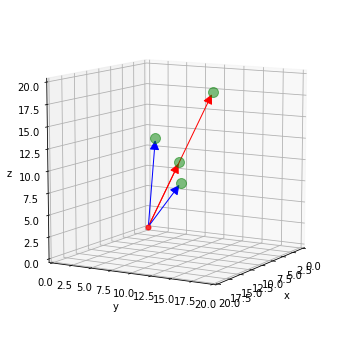

In [0]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim3d(0,20)
ax.set_ylim3d(0,20)
ax.set_zlim3d(0,20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

ax.plot(xs=[0], ys=[0], zs=[0], 
        marker='o', markersize=5, color='red', alpha=0.8)
ax.plot(xs=vs_T[0], ys=vs_T[1], zs=vs_T[2], 
        marker='o', markersize=10, color='green', alpha=0.5,
        linewidth=0)
for i, v in enumerate(vs):
  if i<2: color = 'red'
  else: color = "blue"
  a = Arrow3D([0, v[0]], [0, v[1]], [0, v[2]], 
              mutation_scale=20, 
              lw=1, arrowstyle="-|>", color=color)
  ax.add_artist(a)
plt.draw()
plt.show();

# Span

3BLUE1BROWN SERIES  S1 • E2  
Linear combinations, span, and basis vectors | Essence of linear algebra, chapter 2  
https://www.youtube.com/watch?v=k7RM-ot2NWY    

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# vg = vh / 4 

# [1, 2]
# [4 ,8]


# [1, 2] * -4
# [0, 0]

# rank = 1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# [1, 2, 3]
# [-1, 0, 7]
# [4, 8 , 2]

# [1, 2, 3]
# [0, 1, 5]
# [0, 0, 1]

# rank = 3

https://en.wikipedia.org/wiki/Rank_(linear_algebra)  

##  If the span of n=3 vectors has dimension p=3, then p=3 of these vectors span the space and there is a set of p=3 coordinates on which they are linearly independent.

# Basis

https://en.wikipedia.org/wiki/Basis_(linear_algebra)   

In mathematics, a set B of elements (vectors) in a vector space V is called a basis, if every element of V may be written in a unique way as a (finite) linear combination of elements of B. The coefficients of this linear combination are referred to as components or coordinates on B of the vector. The elements of a basis are called basis vectors.  

Equivalently B is a basis **if its elements are linearly independent** and **every element of V is a linear combination of elements of B**.[1] In more general terms, **_a basis is a linearly independent spanning set._**  

A vector space can have several bases; however all the bases have the same number of elements, called the dimension of the vector space.  



<img src="https://upload.wikimedia.org/wikipedia/commons/f/f4/3d_two_bases_same_vector.svg">  
The same vector can be represented in two different bases (purple and red arrows).  


## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



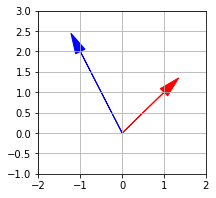

In [0]:
v1 = [1, 1]
v2 = [-1, 2]

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.set_xlim(-2,2)
ax.set_ylim(-1,3)
ax.grid(True)

plt.arrow(0,0, v1[0],v1[1], 
          head_width=.25, head_length=0.5, color ='red');
plt.arrow(0,0, v2[0],v2[1], 
          head_width=.25, head_length=0.5, color ='blue');

## 6.2 What does it mean to form a basis?

B is a basis **if its elements are linearly independent** and **every element of V is a linear combination of elements of B**.[1] In more general terms, **_a basis is a linearly independent spanning set._**  

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# [1, 2, 3]
# [0, 1, 5]
# [0, 0, 1]

# rank = 3

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

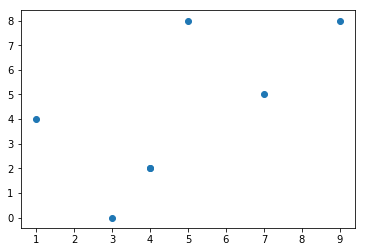

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()